Solution found by formula: w =  [[4.0071715  2.98225924]]


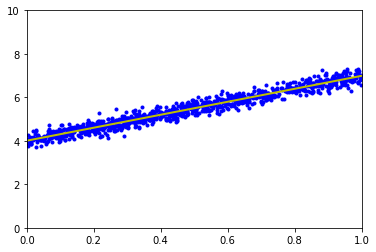

In [39]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [49]:
import time

def grad(w, xi, yi):
#     print(xi.shape)
    a = xi.dot(w)-yi
    return (xi.T*a).reshape(2,1)
    

def SGD_Linear_Regression(w_init, eta):
    w = [w_init]
    EPOCHS = 10
    count = 0
    iter_check = 10
    w_last_check = w_init
    
    for epoch in range(10):
        
        shuffle_id = np.random.permutation(N)
        
        for i in range(N):
            count+=1
            w_new = w[-1] - eta*grad(w[-1], Xbar[shuffle_id[i]], y[shuffle_id[i]])
            w.append(w_new)
            if count%iter_check == 0:
                w_this_check = w_new
                print(np.linalg.norm(w_this_check - w_last_check))
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:
                    return w
                w_last_check = w_this_check
    
    return w

start_time = time.time()
N = X.shape[0]
w = np.array([[0], [1]], np.float64)

w0 = SGD_Linear_Regression(w, 0.01)

print(w0[-1])
print(time.time()-start_time) 

0.5257280319313269
0.4891784365732745
0.3876180102493447
0.3791168700699284
0.30183915026433894
0.27382194124330517
0.2283523347499771
0.21603127073225503
0.1733706569102545
0.19828027423776806
0.14414168000560296
0.14918969142807184
0.11082881452915443
0.1238573714567797
0.09867442554943905
0.07734400256307351
0.06522993737486257
0.04706065226566606
0.05903767469782559
0.04224541677417123
0.03989972278442277
0.04522435023272386
0.04500719959542803
0.030746146181715894
0.03519292596567468
0.017236252032814356
0.013489672813484965
0.018580165811230714
0.02093392558506871
0.012858867620517515
0.01868447950483387
0.0051515250278020095
0.015348059142638648
0.010426979733899604
0.0013525745858759314
[[3.93836015]
 [2.99180547]]
0.026078462600708008
